# Project - Loan Credit Policy Prediction

## Problem 

Loan is an important asset in finance, many people take loan for personal and professional reasons and do their work. But problems comes when they become unable to repay their loan and comens into debts. So this model is build to predict that what are the important ascept where people are unable to repay their loan.

## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Importing dataset

In [8]:
url="https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/loans.csv"
df = pd.read_csv(url)
df.shape

(9578, 14)

Here we have 9578 rows and 14 columns

## Data Exploration

In [3]:
df.columns

Index(['credit.policy', 'loan_purpose', 'int.rate', 'installment',
       'log.annual.inc', 'debt_to_income', 'fico', 'days.with.cr.line',
       'revol.bal', 'revol.util', 'recent_inq.last.6mths', 'delinquent.2yrs',
       'bad_public_record', 'not.fully.paid'],
      dtype='object')

Here we get the datatypes of all the columns and understand what should be our targeted value and what should be our attributes
 - Attributes : 'credit.policy', 'loan_purpose', 'int.rate', 'installment', 'log.annual.inc', 'debt_to_income', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'recent_inq.last.6mths', 'delinquent.2yrs', 'bad_public_record'
 - Target : 'not.fully.paid'

In [9]:
df.head()

,credit.policy,loan_purpose,int.rate,installment,log.annual.inc,debt_to_income,fico,days.with.cr.line,revol.bal,revol.util,recent_inq.last.6mths,delinquent.2yrs,bad_public_record,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0


here we get:
 - It shows the top 5 rows of our datasets.
 - Here we analyse the datasets that what exactly there is in our datasets.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy            9578 non-null int64
loan_purpose             9578 non-null object
int.rate                 9578 non-null float64
installment              9578 non-null float64
log.annual.inc           9574 non-null float64
debt_to_income           9578 non-null float64
fico                     9578 non-null int64
days.with.cr.line        9549 non-null float64
revol.bal                9578 non-null int64
revol.util               9516 non-null float64
recent_inq.last.6mths    9549 non-null float64
delinquent.2yrs          9549 non-null float64
bad_public_record        9549 non-null float64
not.fully.paid           9578 non-null int64
dtypes: float64(9), int64(4), object(1)
memory usage: 1.0+ MB


 - This is information part and here we check the informations of all the columns related to there row size, null values and datatypes respectively.
 - It also count the numbers of datatype such as float64(2), int64(9), object(3)
 - And at last it shows the size of memory

In [6]:
df.loan_purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

Here we check the uniquness of the column

In [7]:
df = df[df.bad_public_record<=df.bad_public_record.quantile(0.999)]
df.shape

(9542, 14)

Here we try to remove the outliers which is present in out dataset. Because of these outliers variation goes in the wrong direction

In [10]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,debt_to_income,fico,days.with.cr.line,revol.bal,revol.util,recent_inq.last.6mths,delinquent.2yrs,bad_public_record,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9574.000000,9578.000000,9578.000000,9549.000000,9.578000e+03,9516.000000,9549.000000,9549.000000,9549.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.931874,12.606679,710.846314,4562.026085,1.691396e+04,46.865677,1.571578,0.163787,0.062101,0.160054
std,0.396245,0.026847,207.071301,0.614736,6.883970,37.970537,2497.985733,3.375619e+04,29.018642,2.198095,0.546712,0.262152,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.700000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.927987,12.665000,707.000000,4139.958333,8.596000e+03,46.400000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.289832,17.950000,737.000000,5730.000000,1.824950e+04,71.000000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [9]:
df.shape

(9542, 14)

After removing outliers we get 9542 rows and 14 columns

### Data Cleaning

In [14]:
# check for duplicate entries
df.duplicated().sum()

0

Here we check wheather any duplicate is present in the list or not

In [15]:
# check for missing values
df.isnull().sum()

credit.policy             0
loan_purpose              0
int.rate                  0
installment               0
log.annual.inc            4
debt_to_income            0
fico                      0
days.with.cr.line        29
revol.bal                 0
revol.util               62
recent_inq.last.6mths    29
delinquent.2yrs          29
bad_public_record        29
not.fully.paid            0
dtype: int64

Here we check how much null values is present in each column
 - Like here we have 6 columns which contain null values

In [16]:
df.skew()

credit.policy            -1.539621
int.rate                  0.164420
installment               0.912522
log.annual.inc            0.028703
debt_to_income            0.023941
fico                      0.471260
days.with.cr.line         1.157578
revol.bal                11.161058
revol.util                0.058099
recent_inq.last.6mths     3.604803
delinquent.2yrs           6.061788
bad_public_record         5.131172
not.fully.paid            1.854592
dtype: float64

With the help of skew we can find that which statical method we should used to fill our null values 
 - If skew > 0 or skew < 0
     - we use Median
 - If skew = 0
     - we use Mean

In [56]:
df["log.annual.inc"].fillna(df["log.annual.inc"].mean(), inplace=True)

In [57]:
df["days.with.cr.line"].fillna(df["days.with.cr.line"].median(), inplace=True)

In [58]:
df["revol.util"].fillna(df["revol.util"].mean(), inplace=True)

In [59]:
df["recent_inq.last.6mths"].fillna(df["recent_inq.last.6mths"].median(), inplace=True)

In [60]:
df["delinquent.2yrs"].fillna(df["delinquent.2yrs"].median(), inplace=True)

In [61]:
df["bad_public_record"].fillna(df["bad_public_record"].median(), inplace=True)

Above 6 rows we have filled our null values with our required values

In [23]:
df.isnull().sum()

credit.policy            0
loan_purpose             0
int.rate                 0
installment              0
log.annual.inc           0
debt_to_income           0
fico                     0
days.with.cr.line        0
revol.bal                0
revol.util               0
recent_inq.last.6mths    0
delinquent.2yrs          0
bad_public_record        0
not.fully.paid           0
dtype: int64

We have 0 Null values present in our datasets

### Data Visualization

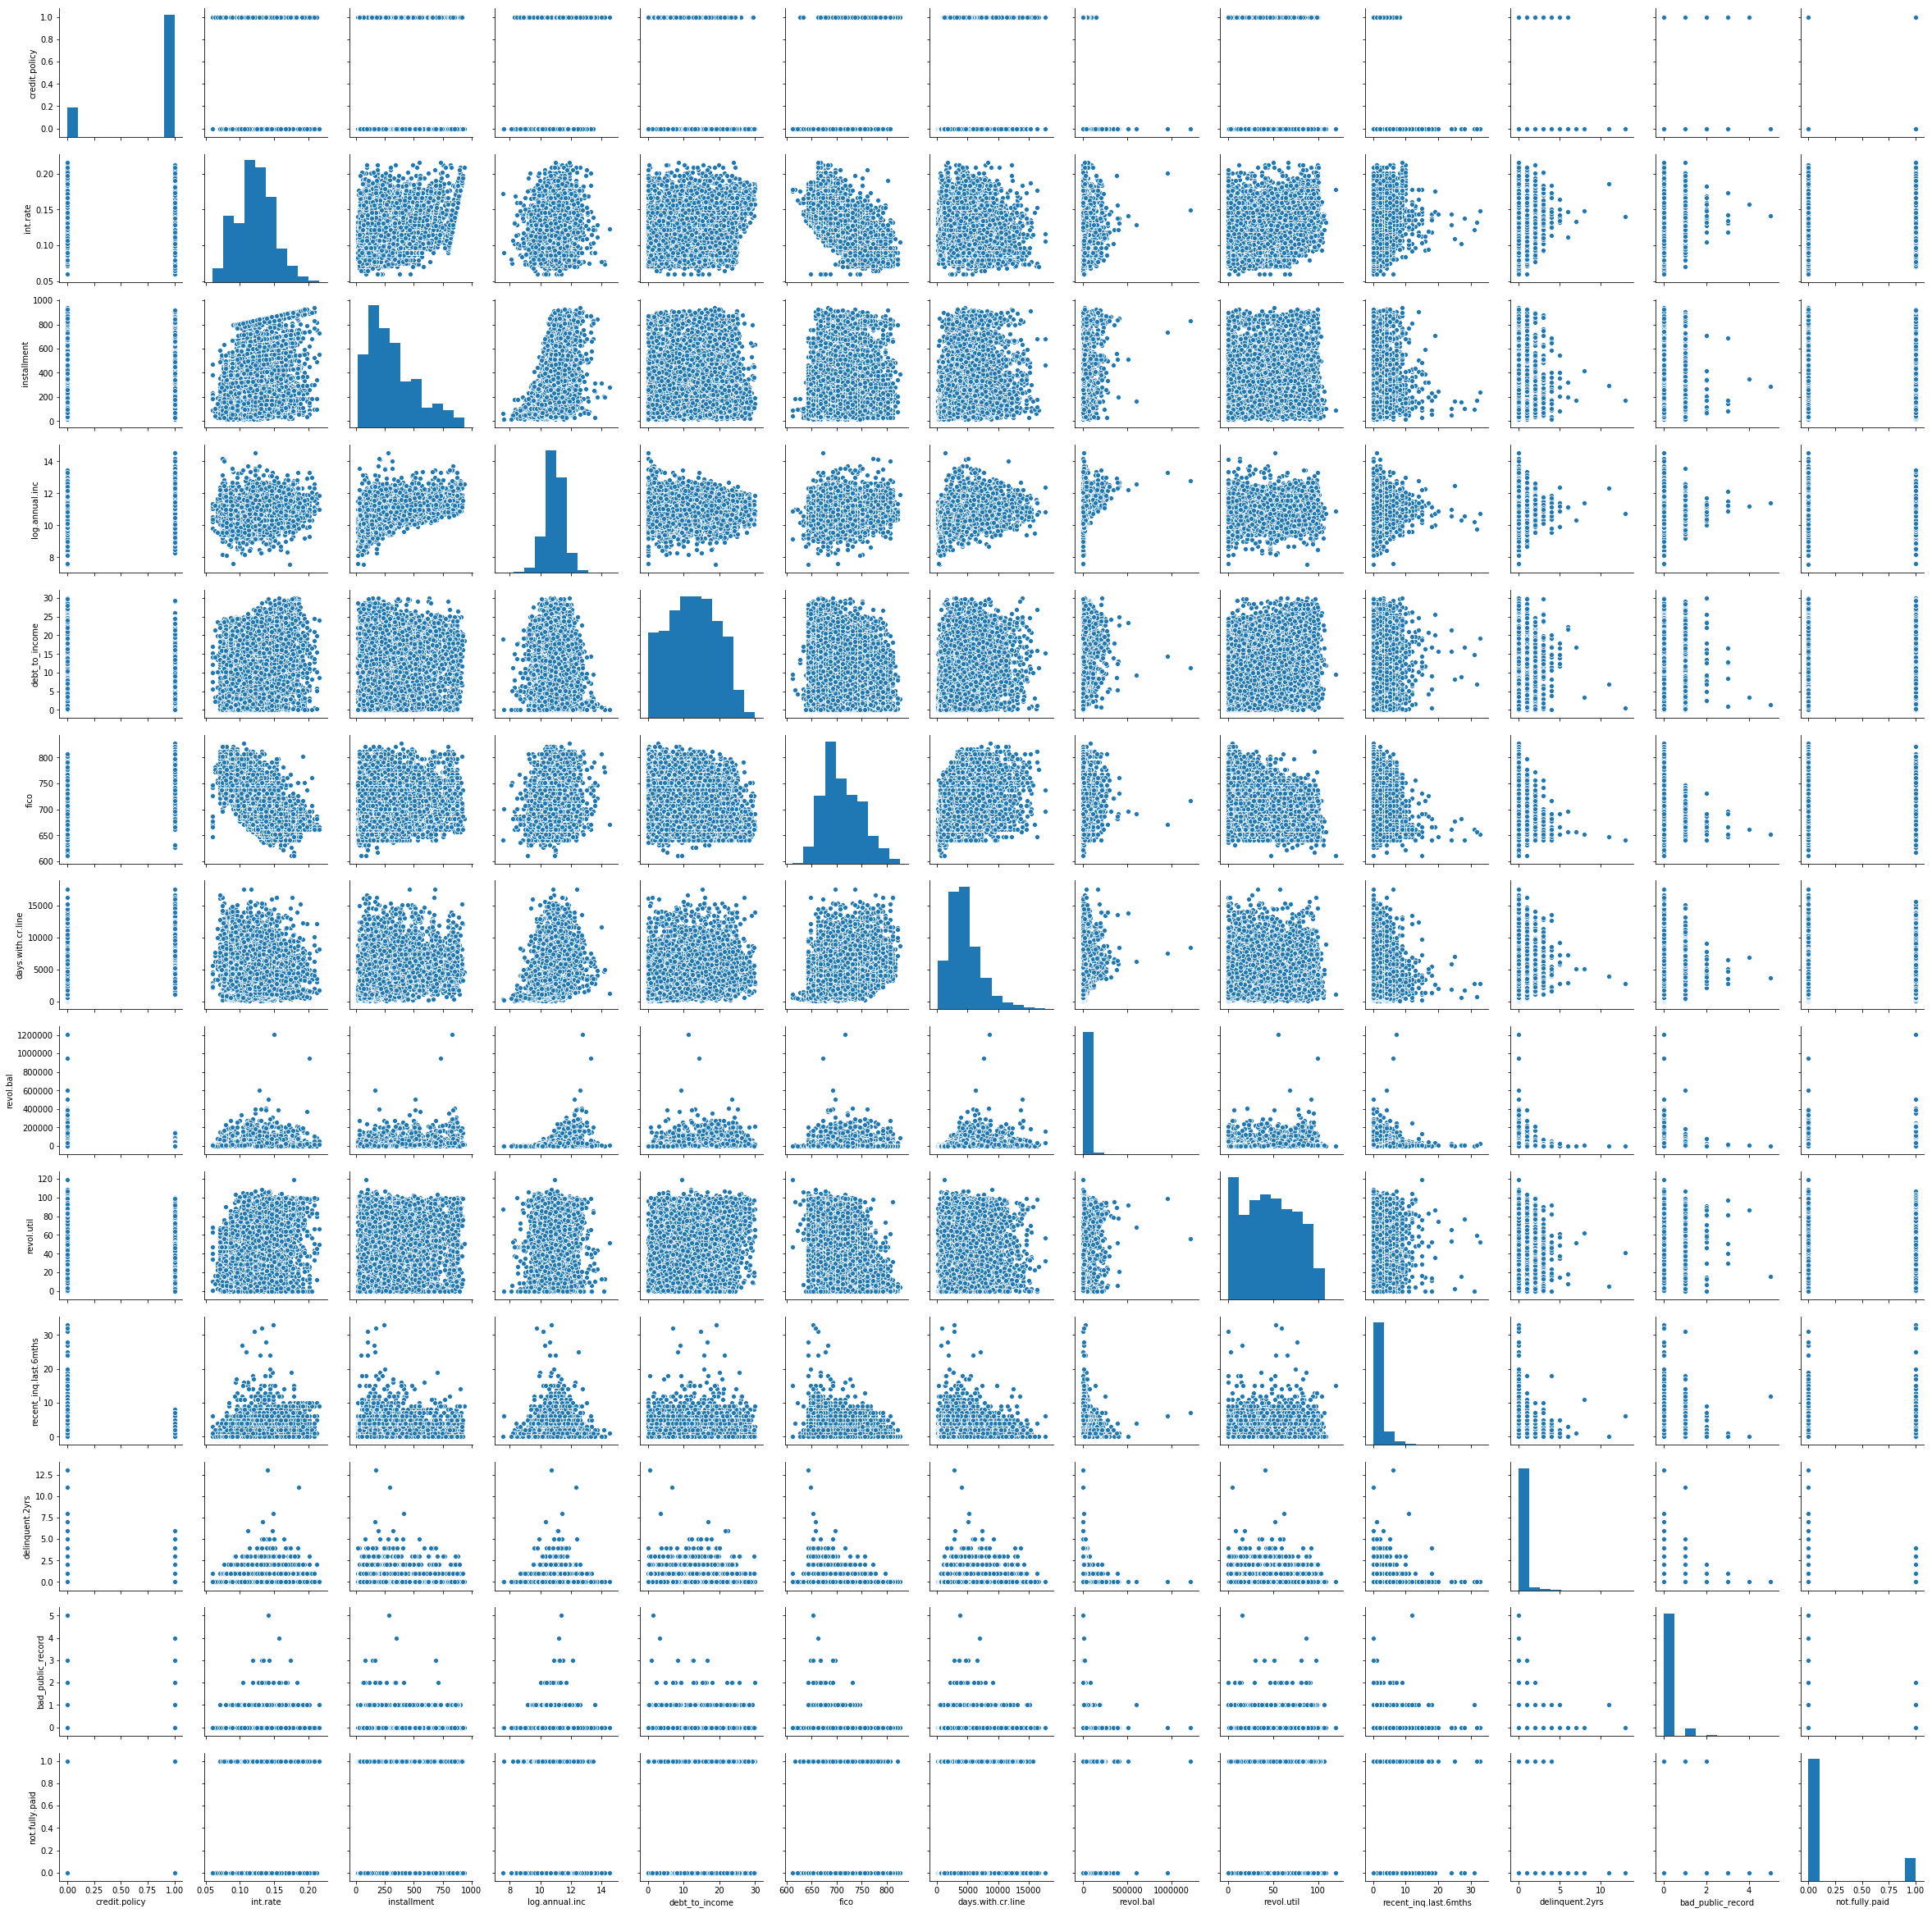

In [24]:
sns.pairplot(df)
plt.show()

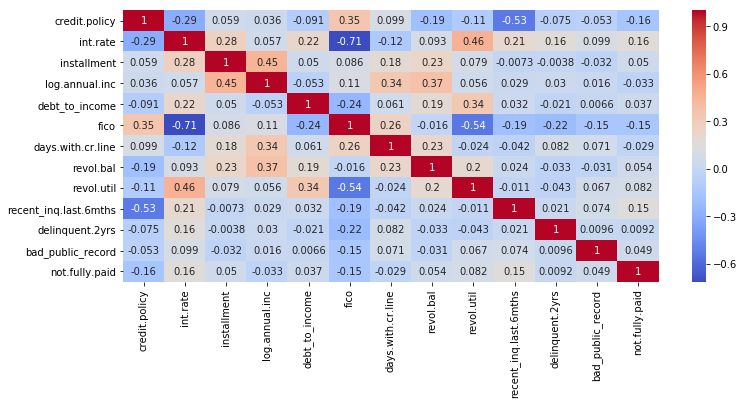

In [25]:
cor = df.corr()
plt.figure(figsize=(12,5))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

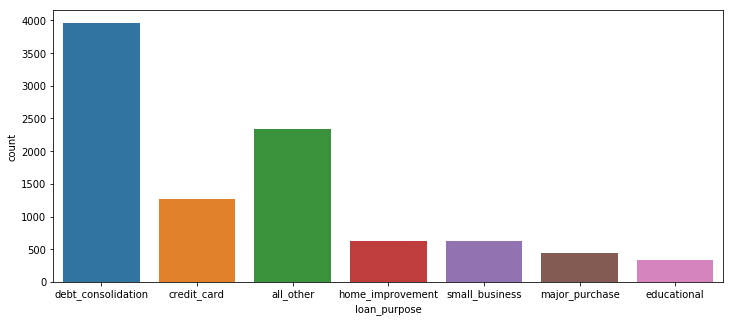

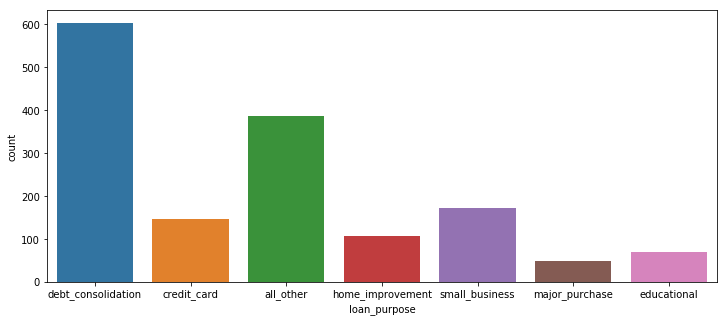

In [26]:
# loan_purpose v/s not.fully.paid
plt.figure(figsize=(12,5))
sns.countplot(df.loan_purpose)
plt.show()
plt.figure(figsize=(12,5))
sns.countplot(df.loan_purpose[df['not.fully.paid']==1],order = df.loan_purpose.unique())
plt.show()

This graph shows that bowrower who take lone for small business and educational purpose will not able to payback their lones

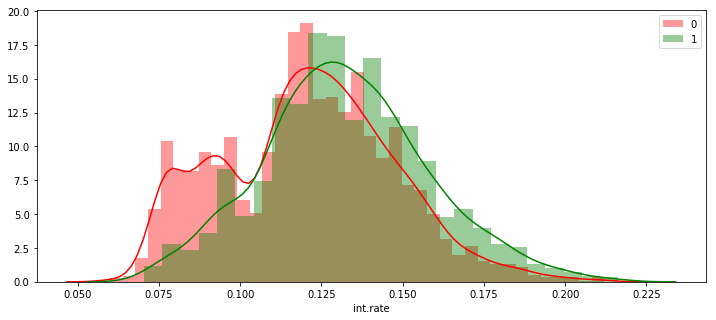

In [30]:
# Interestrate v/s not paid
plt.figure(figsize=(12,5))
sns.distplot(df['int.rate'][df['not.fully.paid']==0],color='r')
sns.distplot(df['int.rate'][df['not.fully.paid']==1],color='g')
plt.legend(['0','1'])
plt.show()


In this graph we can see that if int.rate is more than 12.5 then borower will not pay the loan back

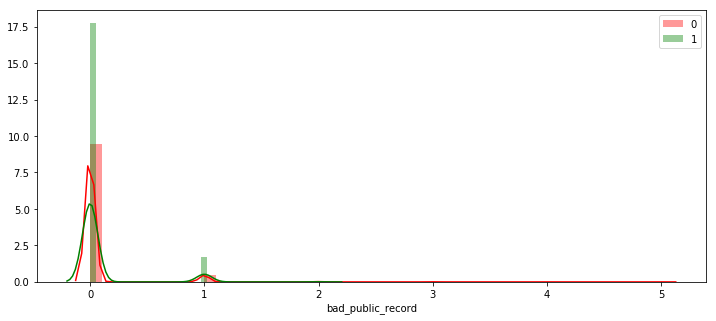

In [31]:
# Interestrate v/s not paid
plt.figure(figsize=(12,5))
sns.distplot(df['bad_public_record'][df['not.fully.paid']==0],color='r')
sns.distplot(df['bad_public_record'][df['not.fully.paid']==1],color='g')
plt.legend(['0','1'])
plt.show()


In [32]:
x = df[["credit.policy","loan_purpose","int.rate","fico","recent_inq.last.6mths"]]
y = df["not.fully.paid"]

Here In x variable we have taken those attributes which are related to our target values
and In y variable we have out target values

In [33]:
x.head()

,credit.policy,loan_purpose,int.rate,fico,recent_inq.last.6mths
0,1,debt_consolidation,0.1189,737,0.0
1,1,credit_card,0.1071,707,0.0
2,1,debt_consolidation,0.1357,682,1.0
3,1,debt_consolidation,0.1008,712,1.0
4,1,credit_card,0.1426,667,0.0


In [62]:
# OneHotEncodeing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("encoder",OneHotEncoder(),[1])],remainder="passthrough")
x = ct.fit_transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [63]:
x.shape

(9578, 12)

In [64]:
x = pd.DataFrame(x)
x.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,-0.567142,1.191856,-0.192721,-0.265117,-0.218647,-0.262855,0.492222,-0.139318,0.688825,-0.715233
1,0.0,1.0,-0.567142,-0.839028,-0.192721,-0.265117,-0.218647,-0.262855,0.492222,-0.578868,-0.101303,-0.715233
2,1.0,0.0,-0.567142,1.191856,-0.192721,-0.265117,-0.218647,-0.262855,0.492222,0.486484,-0.759742,-0.259626
3,1.0,0.0,-0.567142,1.191856,-0.192721,-0.265117,-0.218647,-0.262855,0.492222,-0.813544,0.030385,-0.259626
4,0.0,1.0,-0.567142,-0.839028,-0.192721,-0.265117,-0.218647,-0.262855,0.492222,0.743509,-1.154806,-0.715233
5,0.0,1.0,-0.567142,-0.839028,-0.192721,-0.265117,-0.218647,-0.262855,0.492222,-1.633045,0.425449,-0.715233
6,1.0,0.0,-0.567142,1.191856,-0.192721,-0.265117,-0.218647,-0.262855,0.492222,1.004260,-1.154806,-0.715233
7,1.0,0.0,1.763226,-0.839028,-0.192721,-0.265117,-0.218647,-0.262855,0.492222,-0.418693,0.293761,-0.715233
8,1.0,0.0,-0.567142,-0.839028,-0.192721,3.771915,-0.218647,-0.262855,0.492222,-0.344193,-0.759742,-0.259626
9,1.0,0.0,-0.567142,1.191856,-0.192721,-0.265117,-0.218647,-0.262855,0.492222,-0.020117,-0.101303,-0.259626


### Feature Scaling

In [37]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [38]:
# splitting data into train and test set
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x,y,test_size=0.2,random_state=0)
print(x.shape)
print(xtr.shape)
print(xts.shape)

(9578, 11)
(7662, 11)
(1916, 11)


###  Apply ML Algorithm

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [40]:
# train the model - using trianing data - xtr,ytr
model.fit(xtr,ytr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
#get prediction for xts
ypred = model.predict(xts)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
# check performance of model on test data
# getting prediction for test data
ypred = model.predict(xts)
from sklearn import metrics
metrics.accuracy_score(yts,ypred)

0.8423799582463466

In [43]:
# Recall Calculation
metrics.recall_score(yts,ypred)

0.016611295681063124

### Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_leaf=10)
# train the model
model.fit(xtr,ytr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
ypred = model.predict(xts)
metrics.accuracy_score(yts,ypred)

0.8408141962421712

In [46]:
metrics.recall_score(yts,ypred)

0.04318936877076412

In [47]:
metrics.recall_score(ytr,model.predict(xtr)) 

0.08847402597402597

### KNN Algorithm

In [48]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(xtr,ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [49]:
ypred2 = model2.predict(xts)
metrics.accuracy_score(yts,ypred2)

0.8089770354906054

In [50]:
metrics.recall_score(yts,ypred2)

0.1461794019933555

### Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=50,criterion='gini',max_depth=10,min_samples_leaf=20)

In [66]:
model4.fit(xtr,ytr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [67]:
metrics.recall_score(yts,model.predict(xts)) 

0.04318936877076412

In [68]:
metrics.recall_score(ytr,model.predict(xtr)) 

0.08847402597402597

### Report on Loan credit_policy
 - Here the Random Forest Algorithm gives us a precise result and we have got recall_score values are more accurately
 - recall_score(yts,model.predict(xts)) - 72.78%
 - recall_score(ytr,model.predict(xtr)) - 93.08%

    